In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


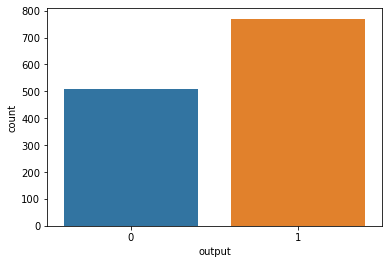

In [3]:
sns.countplot(df["output"])

- there is class imbalance in the target variable 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


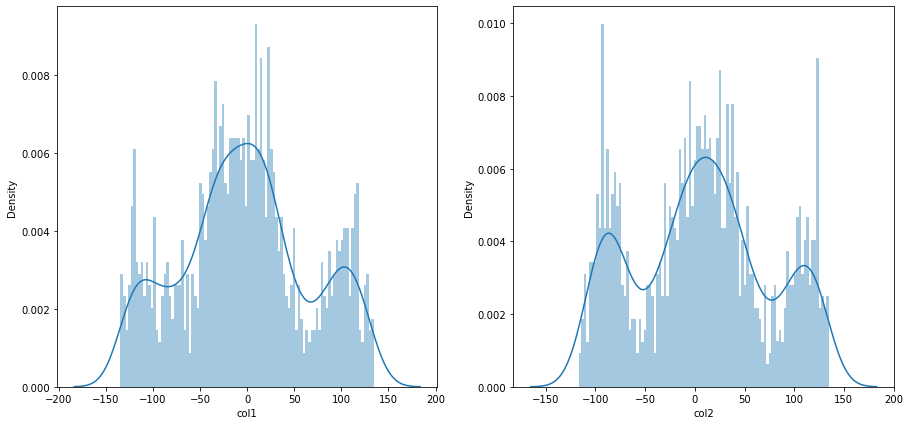

In [4]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(df["col1"],bins=100)
plt.subplot(122)
sns.distplot(df["col2"],bins=100)

- both the independent columns do not follow normal distribution so we need to scale the independent variables.

In [5]:
import warnings
warnings.filterwarnings('ignore')

- checking for the assumption of logistic regression i.e. whether data is linearly separable or not 

Text(0.5, 1.0, 'col1 vs col2 with hue')

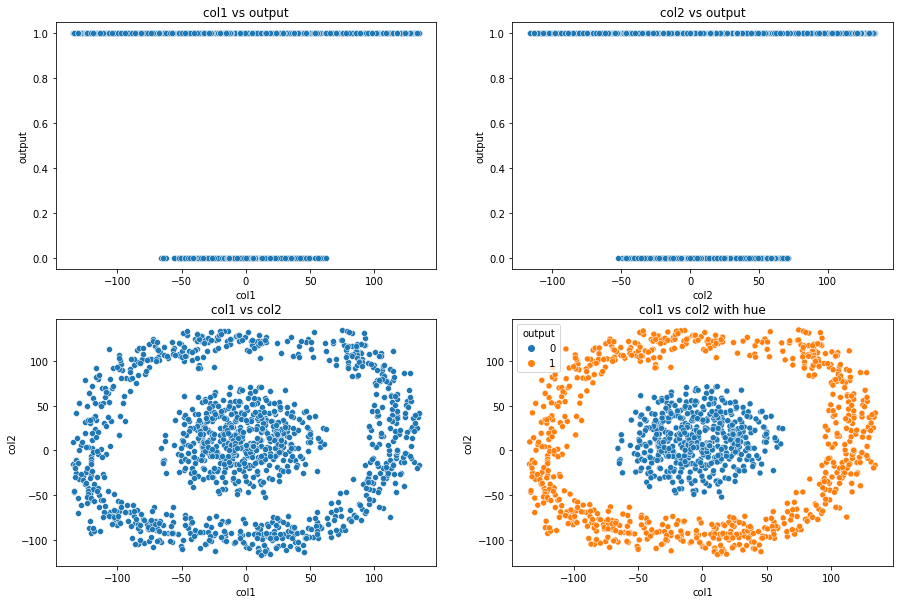

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.scatterplot(df["col1"],df["output"])
plt.title("col1 vs output")
plt.subplot(222)
sns.scatterplot(df["col2"],df["output"])
plt.title("col2 vs output")
plt.subplot(223)
sns.scatterplot(df["col1"],df["col2"])
plt.title("col1 vs col2")
plt.subplot(224)
sns.scatterplot(df["col1"],df["col2"],hue=df["output"])
plt.title("col1 vs col2 with hue")


- we can observe that the data is not linearly separable.

### Pre-processing

In [7]:
X= df.drop(['output'],axis=1)
y=df["output"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100)

In [10]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((958, 2), (958,), (320, 2), (320,))

- Let's apply logistic regression on the data and see how it performs.

### Logistic Regression 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
#calling the model object
model1=LogisticRegression()

#fitting the model
log_reg= model1.fit(X_train,y_train)

#predicting model performance on train and test 
train_pred=log_reg.predict(X_train)
test_pred=log_reg.predict(X_test)

#predicting probabilities 
train_prob=log_reg.predict_proba(X_train)[:,1]
test_prob=log_reg.predict_proba(X_test)[:,1]


#test accuracy
test_acc= metrics.accuracy_score(test_pred,y_test)


#train accuracy
train_acc= metrics.accuracy_score(train_pred,y_train)

In [13]:
print("precision: ", metrics.precision_score(y_test,test_pred))
print("recall:",metrics.recall_score(y_test,test_pred))

precision:  0.628125
recall: 1.0


In [14]:
print("train Accuracy: ",train_acc)
print("Test accuracy:",test_acc)

train Accuracy:  0.593945720250522
Test accuracy: 0.628125


In [15]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, test_prob)
roc_auc = auc(fpr1, tpr1)
roc_auc

0.540407207659183

- The model is underfitting since it is not able to learn the train data properly, and has bad performance .

- The potential reason can be because the data is violating the assumption of logistic regression i.e. Data is linearly separable.

### Support Vector Classifier with Linear kernel

In [16]:
from sklearn.svm import SVC

In [17]:
#calling the model object
model2 = SVC(C=1,kernel='linear',probability=True)

#fitting the model
svc_linear = model2.fit(X_train,y_train)

#predicting model performance on train and test 
train_pred=svc_linear.predict(X_train)

#test predictions
test_pred=svc_linear.predict(X_test)


#predicting probabilities 
train_prob=svc_linear.predict_proba(X_train)[:,1]
test_prob=svc_linear.predict_proba(X_test)[:,1]

#train accuracy
train_acc=metrics.accuracy_score(train_pred,y_train)
print("Train Accuracy: ",train_acc)

#test accuracy
test_acc=metrics.accuracy_score(test_pred,y_test)
print("Test Accuracy: ",test_acc)


Train Accuracy:  0.593945720250522
Test Accuracy:  0.628125


In [18]:
print("precision: ", metrics.precision_score(y_test,test_pred))
print("recall:",metrics.recall_score(y_test,test_pred))

precision:  0.628125
recall: 1.0


In [19]:
fpr2, tpr2, threshold2 = roc_curve(y_test, test_prob)
roc_auc2 = auc(fpr2, tpr2)
roc_auc2


0.5402817843555332

- it is performing same as logistic regression regression, the model is underfitting.`

### Support Vector Classifier with rbf kernel

In [20]:
#calling the model object
model3 = SVC(C=1,kernel='rbf',probability=True)

#fitting the model
svc_rbf = model3.fit(X_train,y_train)

#predicting model performance on train and test 
train_pred=svc_rbf.predict(X_train)

#test predictions
test_pred=svc_rbf.predict(X_test)

#predicting probabilities 
train_prob=svc_rbf.predict_proba(X_train)[:,1]
test_prob=svc_rbf.predict_proba(X_test)[:,1]

#train accuracy
train_acc=metrics.accuracy_score(train_pred,y_train)
print("Train Accuracy: ",train_acc)

#test accuracy
test_acc=metrics.accuracy_score(test_pred,y_test)
print("Test Accuracy: ",test_acc)


Train Accuracy:  1.0
Test Accuracy:  1.0


In [21]:
print("precision: ", metrics.precision_score(y_test,test_pred))
print("recall:",metrics.recall_score(y_test,test_pred))

precision:  1.0
recall: 1.0


In [22]:
fpr3, tpr3, threshold3 = roc_curve(y_test, test_prob)
roc_auc3 = auc(fpr3, tpr3)
roc_auc3


1.0

### SVM with rbf kernel  is giving the best accuracy, precision, recall of 100% 

### Comparing the model performances

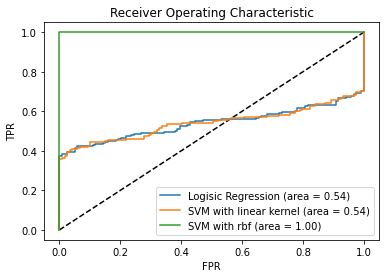

In [23]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logisic Regression (area = %0.2f)" % roc_auc)
plt.plot(fpr2, tpr2, label= "SVM with linear kernel (area = %0.2f)" % roc_auc2)
plt.plot(fpr3, tpr3, label= "SVM with rbf (area = %0.2f)" % roc_auc3)

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

- SVM  with rbf kernel is performing best

### Saving the Model in Pickle

In [24]:
model=SVC(C=1,kernel='rbf')

model.fit(X_train,y_train)

SVC(C=1)

In [25]:
from pickle import dump

In [26]:
dump(model,open('pickle/svm_model.pkl','wb'))

### Predicting on future data point

In [27]:
from pickle import load


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [29]:
def prediction(val1,val2):
    val1=float(val1)
    val2=float(val2)
    dict={1:val1,2:val2}
    col1=pd.Series(dict[1])
    col2=pd.Series(dict[2])
    test=pd.DataFrame({"col1":col1,"col2":col2})
    classifier=load(open('pickle/svm_model.pkl','rb'))
    pred=classifier.predict(test)
    return pred[0]
    

In [34]:
output=prediction(-38.366669,113.000000)
output   

1

### Why SVM with rbf is performing better than logistic Regression?

- Our data is violating the most important assumption of Logistic regression i.e. Linearly separable data so Logistic regression does not perform well. Whereas SVM with a non_linear kernel(rbf) performs well for our data.

- Since our data is inseparable in 2 dimensions, we use kernel trick which transforms the data to a higher dimensions so that the data is separable.rbf kernel helps us to do that with our data.

- SVM tries to find the widest possible separating margin, while Logistic Regression optimizes the log likelihood function, with probabilities modeled by the sigmoid function.

- Logistic Regression is more sensitive to outliers than SVM because the cost function of LR diverges faster than those of SVM. So having an outlier will change the decision boundary completely for the Logistic Regression and hence the not better predictions.



- logistic regression and linear SVM have similar performance

In [33]:
df[df["output"]==1]

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1
...,...,...,...
765,124.488443,14.688084,1
766,97.977002,6.955084,1
767,123.973240,-2.637112,1
768,117.633331,0.000000,1
